In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('insurance.csv')

In [82]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [84]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [85]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [86]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [8]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

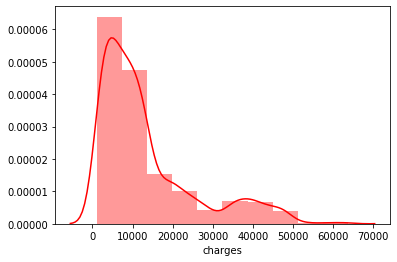

In [87]:
sns.distplot(df['charges'],bins=10,color='red')

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

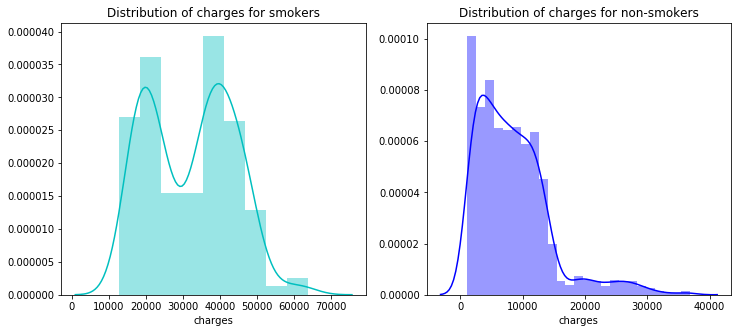

In [88]:
f = plt.figure(figsize=(12,5))

ax = f.add_subplot(121)
sns.distplot(df[df['smoker']=='yes']['charges'],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax = f.add_subplot(122)
sns.distplot(df[df['smoker']=='no']['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

In [89]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


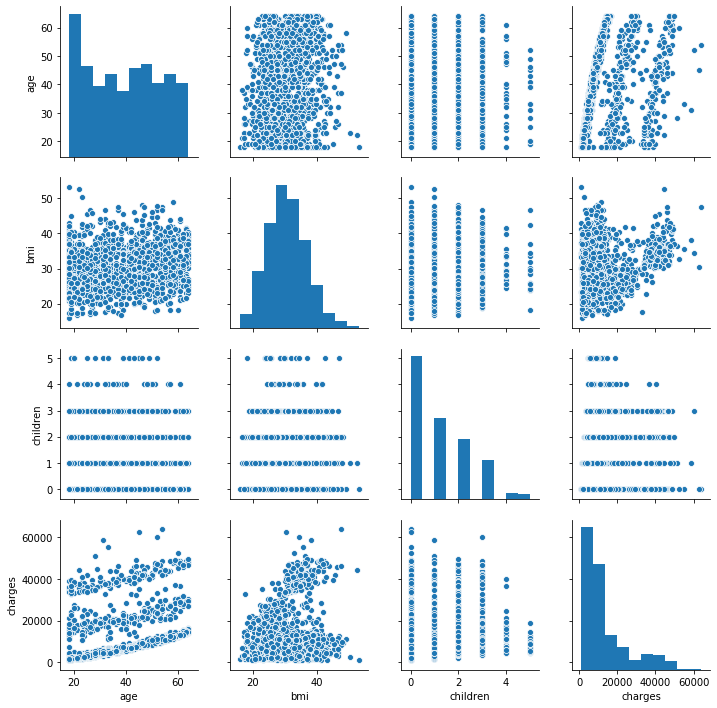

In [10]:
sns.pairplot(df)

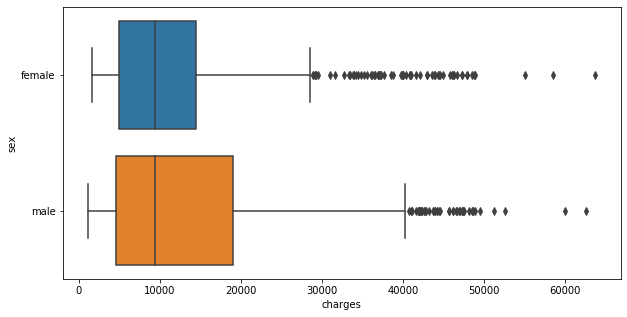

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(x='charges',y='sex',data=df)

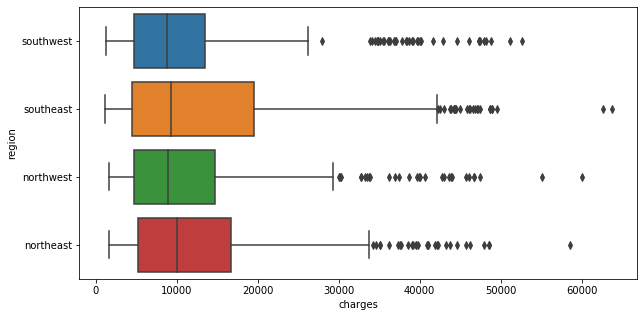

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x='charges',y='region',data=df)

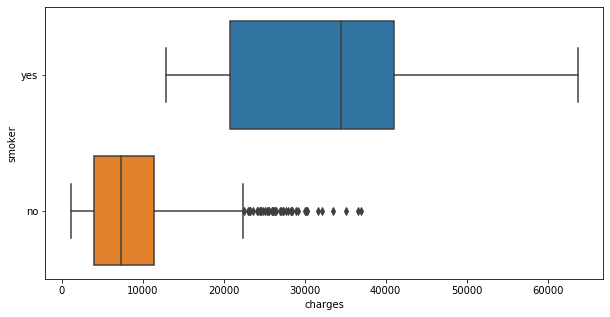

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x='charges',y='smoker',data=df)

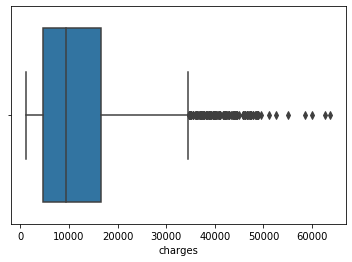

In [17]:
sns.boxplot(x='charges',data=df)

In [90]:
cat = pd.get_dummies(df[['sex','smoker','region']],drop_first=True)

In [41]:
cat

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
1333,1,0,1,0,0
1334,0,0,0,0,0
1335,0,0,0,1,0
1336,0,0,0,0,1


In [91]:
df = pd.concat((df,cat),axis=1)

In [92]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [93]:
df.drop(['sex','smoker','region'],axis=1,inplace=True)

In [94]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


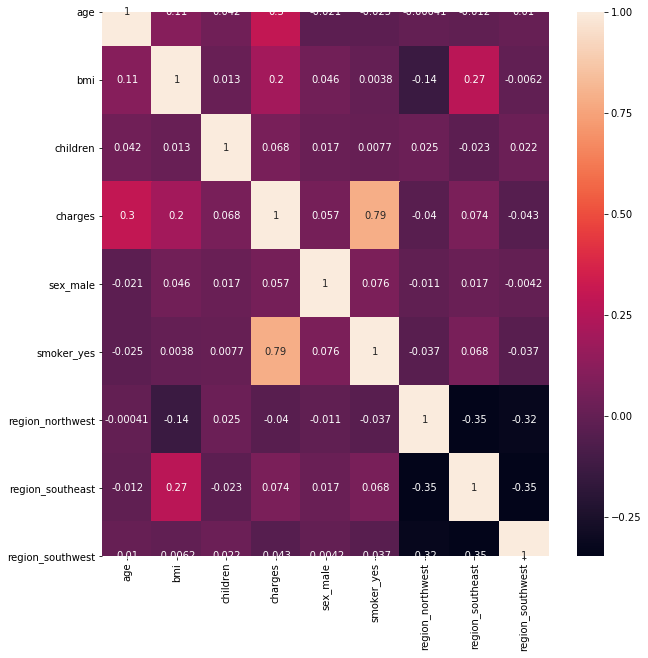

In [95]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [96]:
X = df.drop('charges',axis=1)
y = df['charges']

In [47]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [98]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [99]:
X_train = ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [51]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost
from sklearn import metrics

In [100]:
# definning a function only for R2 sscore

def machine_learning_r2(regressor,X_train,y_train,X_test,y_test):
    regressor.fit(X_train,y_train)
    predictions = regressor.predict(X_test)
    return metrics.explained_variance_score(y_test,predictions)

In [101]:
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
svr = SVR()
knr = KNeighborsRegressor()
dtree = DecisionTreeRegressor()
rfr = RandomForestRegressor()
abr = AdaBoostRegressor(n_estimators=1000)
mlpr = MLPRegressor()
xgb = xgboost.XGBRegressor()


models_list = [lr, lasso, ridge, svr, knr, dtree, rfr, abr, mlpr, xgb]

for model in models_list:
    print(f'{model} R2 score is: {machine_learning_r2(model,X_train,y_train,X_test,y_test)} \n')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) R2 score is: 0.7697826609639534 

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) R2 score is: 0.769789007116129 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) R2 score is: 0.7697601531804812 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False) R2 score is: 0.0038425910159386456 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') R2 score is: 0.8015448415283675 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=Non

C:\Users\shaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False) R2 score is: 0.03058650543463559 

[18:53:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,


C:\Users\shaya\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shaya\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


What if we don't trasnform the data:

In [102]:
X1 = df.drop('charges',axis=1)
y1 = df['charges']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [103]:
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
svr = SVR()
knr = KNeighborsRegressor()
dtree = DecisionTreeRegressor()
rfr = RandomForestRegressor()
abr = AdaBoostRegressor(n_estimators=1000)
mlpr = MLPRegressor()
xgb = xgboost.XGBRegressor()


models_list = [lr, lasso, ridge, svr, knr, dtree, rfr, abr, mlpr, xgb]

for model in models_list:
    print(f'{model} R2 score is: {machine_learning_r2(model,X1_train,y1_train,X1_test,y1_test)} \n')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) R2 score is: 0.7697826609639536 

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) R2 score is: 0.7697865337693646 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) R2 score is: 0.7695304319810934 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False) R2 score is: 0.0003186016486224075 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') R2 score is: 0.19752221392313785 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=N

C:\Users\shaya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\shaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False) R2 score is: 0.07922314087624904 

[18:53:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,


C:\Users\shaya\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shaya\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Almost the same result!!!

let's add polynomial signs:  
(found this under this Kernel: https://www.kaggle.com/hely333/eda-regression)

In [104]:
from sklearn.preprocessing import PolynomialFeatures

In [105]:
X2 = df.drop(['charges','region_northwest','region_southeast','region_southwest'],axis=1)
y2 = df['charges']

quad = PolynomialFeatures (degree = 2)
X_quad = quad.fit_transform(X2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X_quad, y2, test_size=0.3, random_state=42)

In [106]:
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
svr = SVR()
knr = KNeighborsRegressor()
dtree = DecisionTreeRegressor()
rfr = RandomForestRegressor()
abr = AdaBoostRegressor(n_estimators=1000)
mlpr = MLPRegressor()
xgb = xgboost.XGBRegressor()


models_list = [lr, lasso, ridge, svr, knr, dtree, rfr, abr, mlpr, xgb]

for model in models_list:
    print(f'{model} R2 score is: {machine_learning_r2(model,X2_train,y2_train,X2_test,y2_test)} \n')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) R2 score is: 0.8626053227952785 

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) R2 score is: 0.8626095832368053 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) R2 score is: 0.8627888957071327 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False) R2 score is: 3.960786731926902e-07 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') R2 score is: 0.10510641053325631 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=N

C:\Users\shaya\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11235505400.079256, tolerance: 13709441.61277771
  positive)
C:\Users\shaya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\shaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False) R2 score is: 0.8444146186102081 

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=1000, random_state=None) R2 score is: 0.8423633750700861 

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, pow

C:\Users\shaya\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\shaya\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
